## German Credit Dataset EDA

Vamos a conducir en un primer lugar el análisis exploratorio de los datos del German Credit Dataset

In [1]:
# Cargamos las librerías necesarias para el análisis exploratorio de los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos la base de datos original y sin ningún tipo de transformación

col_names = [
    'cheking_status', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings', 'employment', 'installment_rate', 'personal_status', 'other_parties',
    'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing',
    'existing_credits', 'job', 'num_dependents', 'telephone', 'foreign_worker', 'credit'
]

df_raw = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
    delim_whitespace=True,
    header=None,
    names=col_names
)

# Vamos a ver las dimensiones del conjunto de datos

print(f'Dimensiones del conjunto de datos: {df_raw.shape}')

C:\Users\sbenitez\AppData\Local\Temp\ipykernel_88068\3097116580.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_raw = pd.read_csv(


Dimensiones del conjunto de datos: (1000, 21)


Observamos que la base de datos tiene 1000 observaciones y 21 variables, 20 de ellas explicativas y la variable restante es la variable respuesta

In [3]:
df_raw.head()

,cheking_status,duration,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# Hacemos lo siguiente para las variables numéricas

df_raw.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents,credit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
# Comprobamos el tipo de variables y si existen valores faltantes

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cheking_status       1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings              1000 non-null   object
 6   employment           1000 non-null   object
 7   installment_rate     1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_parties        1000 non-null   object
 10  residence_since      1000 non-null   int64 
 11  property_magnitude   1000 non-null   object
 12  age                  1000 non-null   int64 
 13  other_payment_plans  1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

Observamos que no hay valores faltantes, y que la base de datos cuenta con 7 variables numéricas y 13 categóricas, además de la variable respuesta. Vamos a estudiar los valores de las variables categóricas:

In [6]:
# Seleccionamos solo las columnas categóricas
categorical_columns = df_raw.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f'\n{col}:\n')
    print(df_raw[col].value_counts())


cheking_status:

cheking_status
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

credit_history:

credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

purpose:

purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

savings:

savings
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

employment:

employment
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64

personal_status:

personal_status
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64

other_parties:

other_parties
A101    907
A103     52
A102     41
Name: count, dtype: int64

property_magnitude:

property_magnitude
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64

other_payment_plans:

other_payment_plans
A143    814
A141    139
A142     47
Name: count, dtype: 

In [7]:
df_raw['credit'].value_counts()

credit
1    700
2    300
Name: count, dtype: int64

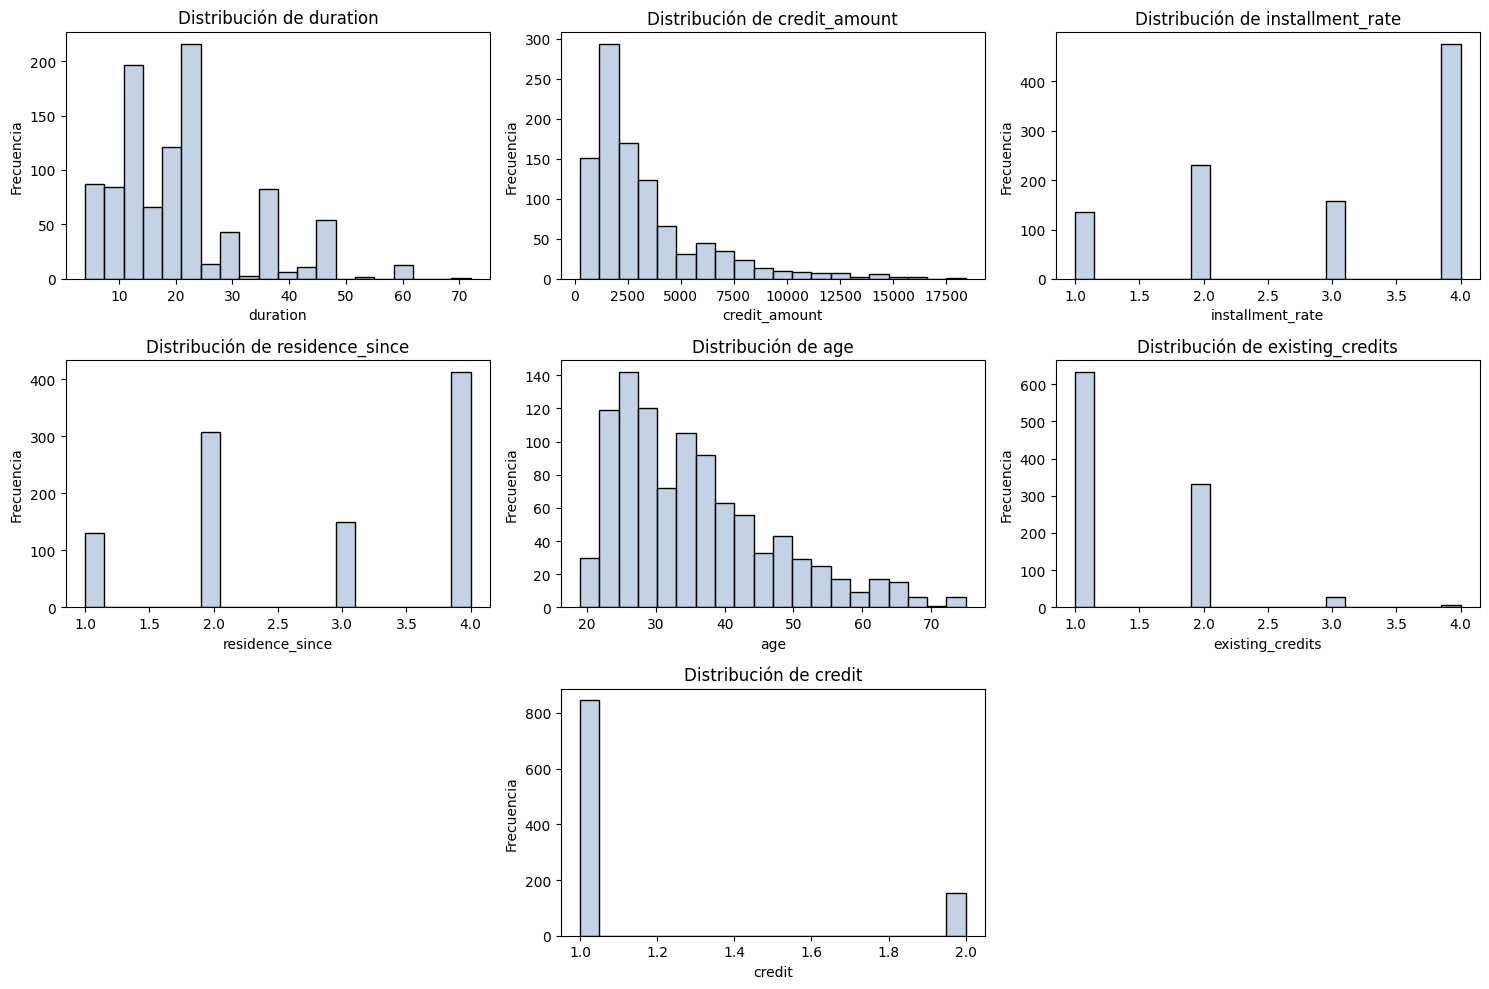

In [8]:
# Creamos histogramas para las variables numéricas y mostramos el séptimo histograma centrado

numeric_cols = df_raw.select_dtypes(include=np.number).columns
numeric_cols_no_response = [col for col in df_raw.select_dtypes(include=np.number).columns if col != 'credit']

plt.figure(figsize=(15, 10))

# Histograma 1 al 6
for i, col in enumerate(numeric_cols_no_response[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_raw[col], bins=20, kde=False, color='lightsteelblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Histograma 7 centrado 
plt.subplot(3, 3, 8)
sns.histplot(df_raw[numeric_cols_no_response[-1]], bins=20, kde=False, color='lightsteelblue', edgecolor='black')
plt.title(f'Distribución de {numeric_cols[-1]}')
plt.xlabel(numeric_cols[-1])
plt.ylabel('Frecuencia')

# Eliminamos además el espacio sobrante
plt.tight_layout()
plt.show()

Vamos a hacer los histogramas ahora pero con frecuencias relativas

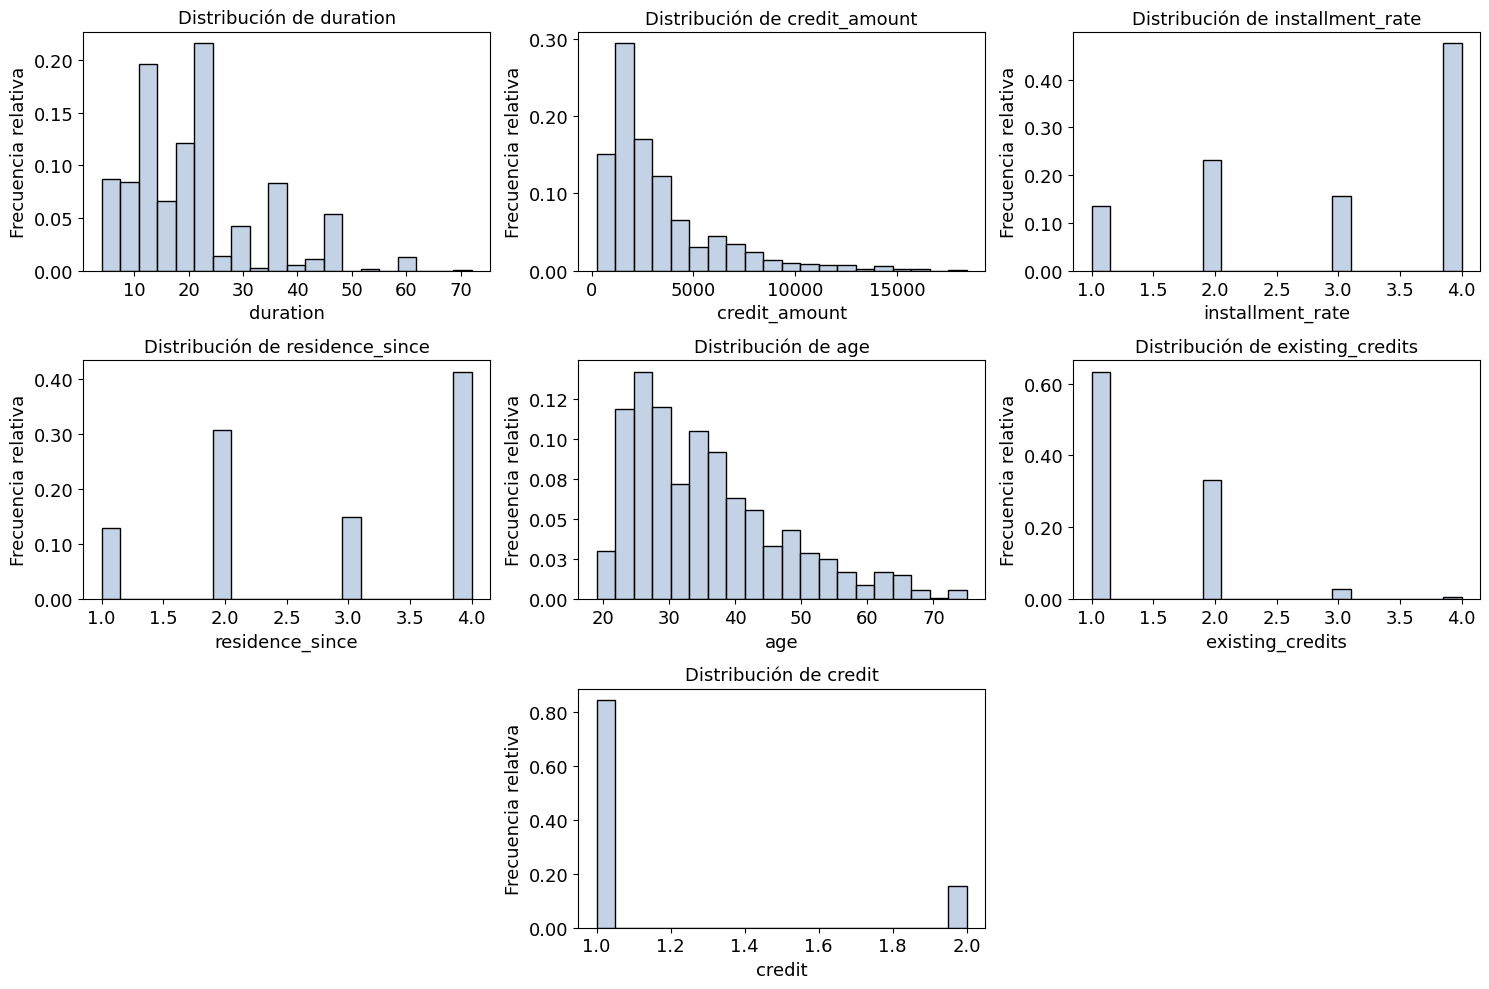

In [9]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Formateador para 2 decimales en el eje Y
formatter = FuncFormatter(lambda y, _: f'{y:.2f}')

# Vamos a mostrar ahora los histogramas con frecuencias relativas
numeric_cols = df_raw.select_dtypes(include=np.number).columns
numeric_cols_no_response = [col for col in df_raw.select_dtypes(include=np.number).columns if col != 'credit']

plt.figure(figsize=(15, 10))

# Histograma 1 al 6
for i, col in enumerate(numeric_cols_no_response[:-1], 1):
    ax = plt.subplot(3, 3, i)
    sns.histplot(df_raw[col], bins=20, stat='probability', kde=False, color='lightsteelblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}', fontsize=13)
    ax.set_xlabel(col, fontsize=13)
    ax.set_ylabel('Frecuencia relativa', fontsize=13)
    ax.tick_params(axis='both', labelsize=13)
    ax.yaxis.set_major_formatter(formatter)

    if col == 'duration':
        ax.xaxis.set_major_locator(MultipleLocator(base=10))

    if col == 'credit_amount':
        ax.xaxis.set_major_locator(MultipleLocator(base=5000))

# Histograma 7 centrado
ax = plt.subplot(3, 3, 8)
sns.histplot(df_raw[numeric_cols_no_response[-1]], bins=20, stat='probability', kde=False, color='lightsteelblue', edgecolor='black')
ax.set_title(f'Distribución de {numeric_cols[-1]}', fontsize=13)
ax.set_xlabel(numeric_cols[-1], fontsize=13)
ax.set_ylabel('Frecuencia relativa', fontsize=13)
ax.tick_params(axis='both', labelsize=13)
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

A continuación mostramos boxplots y un pie chart para estudiar la distrubución de las observaciones de la variable edad

C:\Users\sbenitez\AppData\Local\Temp\ipykernel_88068\4004605542.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_label', y='age', data=df_plot, palette=['#BC8F8F', 'lightsteelblue'], ax=axes[0])


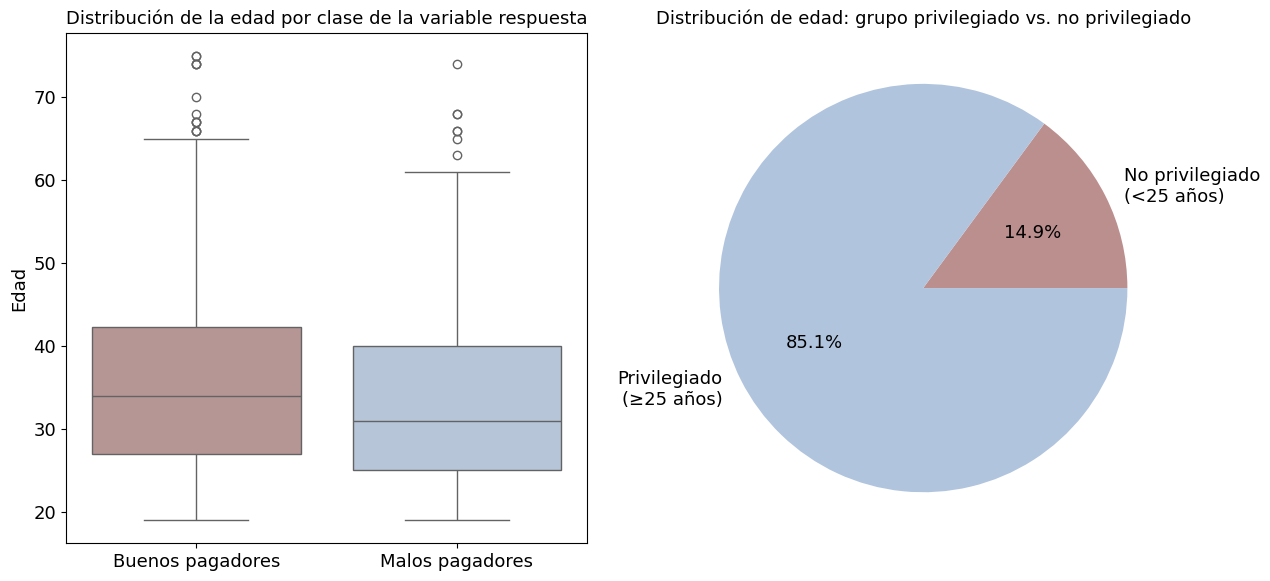

In [10]:
# Configuración general
plt.rcParams.update({'font.size': 13})

df_plot = df_raw.copy()
df_plot['credit_label'] = df_plot['credit'].map({1: 'Buenos pagadores', 2: 'Malos pagadores'})

# Creamos variable binaria para el grupo privilegiado
df_plot['grupo_privilegio'] = df_plot['age'].apply(lambda x: 'No privilegiado\n(<25 años)' if x < 25 else 'Privilegiado\n(≥25 años)')

# Conteos ordenados según el orden deseado de las etiquetas
pie_labels = ['No privilegiado\n(<25 años)', 'Privilegiado\n(≥25 años)']
pie_counts = df_plot['grupo_privilegio'].value_counts().reindex(pie_labels)
pie_colors = ['#BC8F8F', 'lightsteelblue']

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Boxplot
sns.boxplot(x='credit_label', y='age', data=df_plot, palette=['#BC8F8F', 'lightsteelblue'], ax=axes[0])
axes[0].set_title('Distribución de la edad por clase de la variable respuesta', fontsize=13)
axes[0].set_xlabel('')
axes[0].set_ylabel('Edad', fontsize=13)
axes[0].tick_params(axis='both', labelsize=13)

# Pie chart
axes[1].pie(pie_counts, labels=pie_labels, autopct='%1.1f%%', colors=pie_colors, textprops={'fontsize': 13})
axes[1].set_title('Distribución de edad: grupo privilegiado vs. no privilegiado', fontsize=13)

plt.tight_layout()
plt.show()

Tras esto, estudiamos la distribución de la variable respuesta de la siguiente manera:

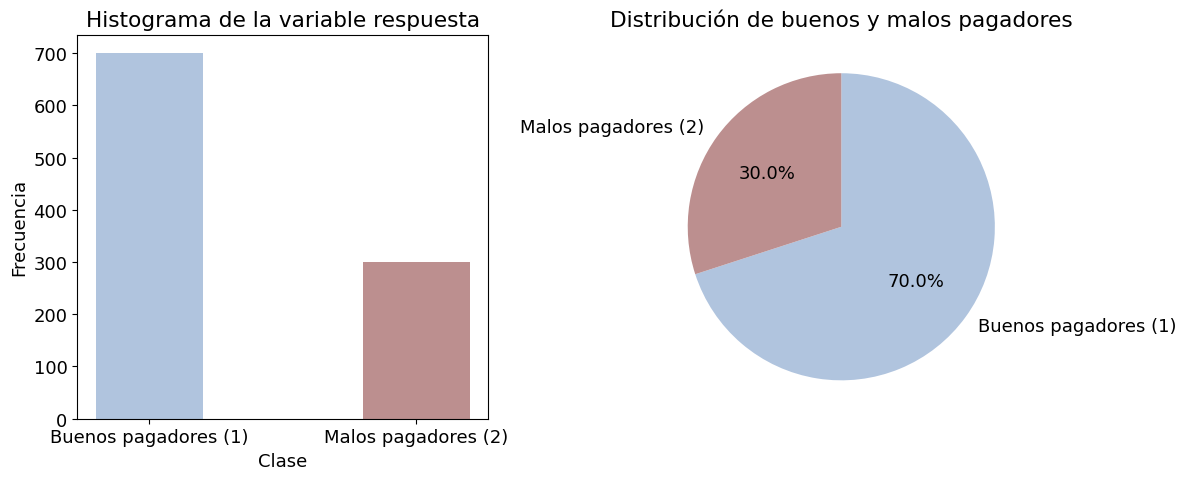

In [11]:
# Vamos a representar el histograma y el pie chart para la variable respuesta y así ver la distribución de las observaciones

# Contamos los valores de la variable respuesta
response_counts = df_raw['credit'].value_counts().sort_index()

labels_text = ['Buenos pagadores (1)', 'Malos pagadores (2)']
colors = ['#B0C4DE', '#BC8F8F']  # 1 -> B0C4DE, 2 -> BC8F8F

bar_colors = ['#B0C4DE' if cls == 1 else '#BC8F8F' for cls in response_counts.index]
bar_labels = ['Buenos pagadores (1)', 'Malos pagadores (2)']

# Para mostrar un histograma y un pie chart en la misma figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histograma 
axs[0].bar([1, 2], response_counts.values, color=bar_colors, width=0.4)
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(bar_labels)  # sin rotation
axs[0].set_title('Histograma de la variable respuesta')
axs[0].set_xlabel('Clase')
axs[0].set_ylabel('Frecuencia')

# Pie chart 
axs[1].pie(
    response_counts,
    labels=labels_text,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
axs[1].set_title('Distribución de buenos y malos pagadores')

plt.tight_layout()
plt.show()

# Realmente ambos gráficos muestran lo mismo, por lo que sería redundante mostrar ambos.

Y para estudiar la relación entre las variables numéricas. Representamos la matriz de correlaciones haciendo uso de un heatmap

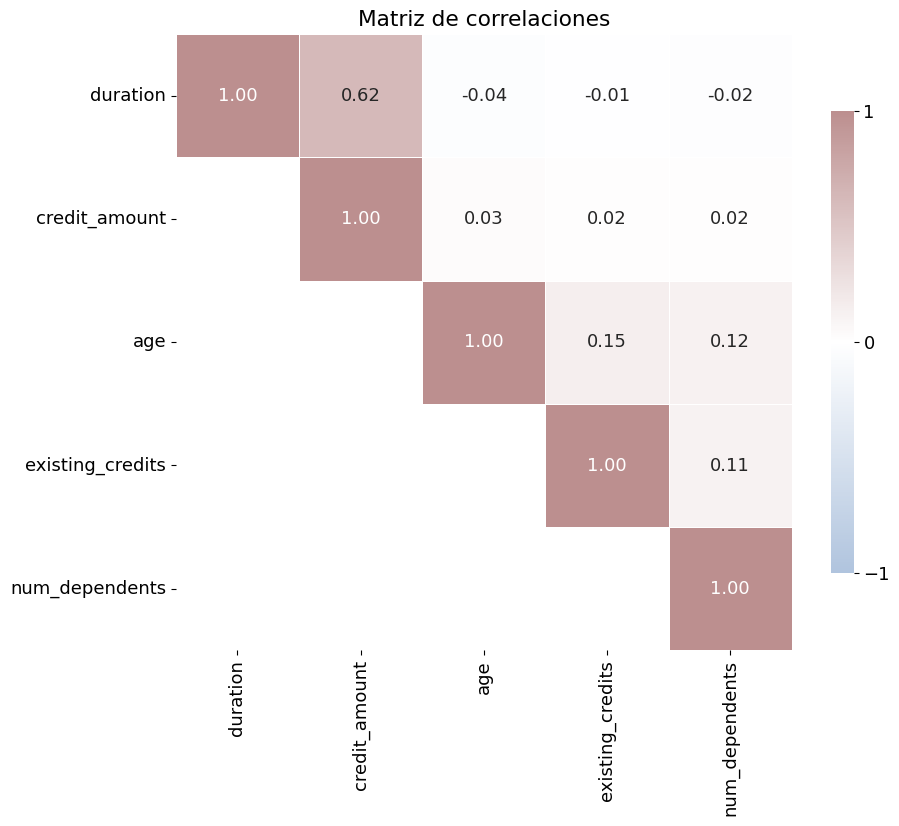

In [12]:
# Para que siga la misma colorimetría que el resto del documento
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

variables_no_ordinales = ['duration', 'credit_amount', 'age','existing_credits', 'num_dependents']
corr_matrix = df_raw[variables_no_ordinales].corr()

# Máscara para la mitad inferior
mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)

cmap = LinearSegmentedColormap.from_list(
    'custom_diverging',
    ['lightsteelblue', 'white', '#BC8F8F']
)

norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    norm=norm,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={
        "shrink": 0.75,
        "ticks": [-1, 0, 1]
    }
)
plt.title("Matriz de correlaciones")
plt.show()

La única correlación algo elevada es la de las variables duration y credit_amount (como cabe esperar). Vamos a representar un scatter plot de esas variables para ver cómo es que es la relación entre ellas.

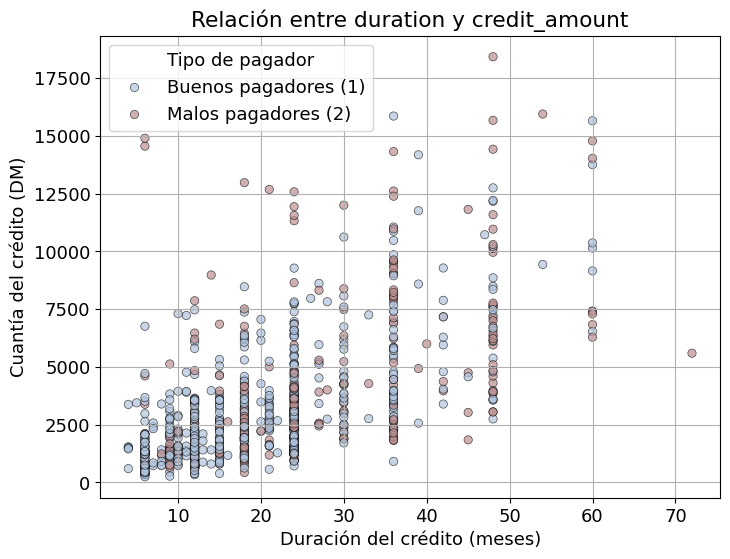

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_raw,
    x='duration',
    y='credit_amount',
    hue='credit',
    palette={1: 'lightsteelblue', 2: '#BC8F8F'},
    edgecolor='black',
    alpha=0.7
)
plt.title('Relación entre duration y credit_amount')
plt.xlabel('Duración del crédito (meses)')
plt.ylabel('Cuantía del crédito (DM)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Buenos pagadores (1)', 'Malos pagadores (2)'], title='Tipo de pagador')

plt.grid(True)
plt.show()

Para estudiar la posible existencia de multicolinealidad entre las variables, calculamos los VIFs

In [14]:
import statsmodels.api as sm

X = df_raw[variables_no_ordinales]
X = sm.add_constant(X)  # Añadir intercepto

# Calculamos el VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados (excluyendo la constante)
print(vif_data[1:].sort_values("VIF", ascending=False))

           Variable       VIF
1          duration  1.652294
2     credit_amount  1.651897
3               age  1.039097
4  existing_credits  1.032388
5    num_dependents  1.024508


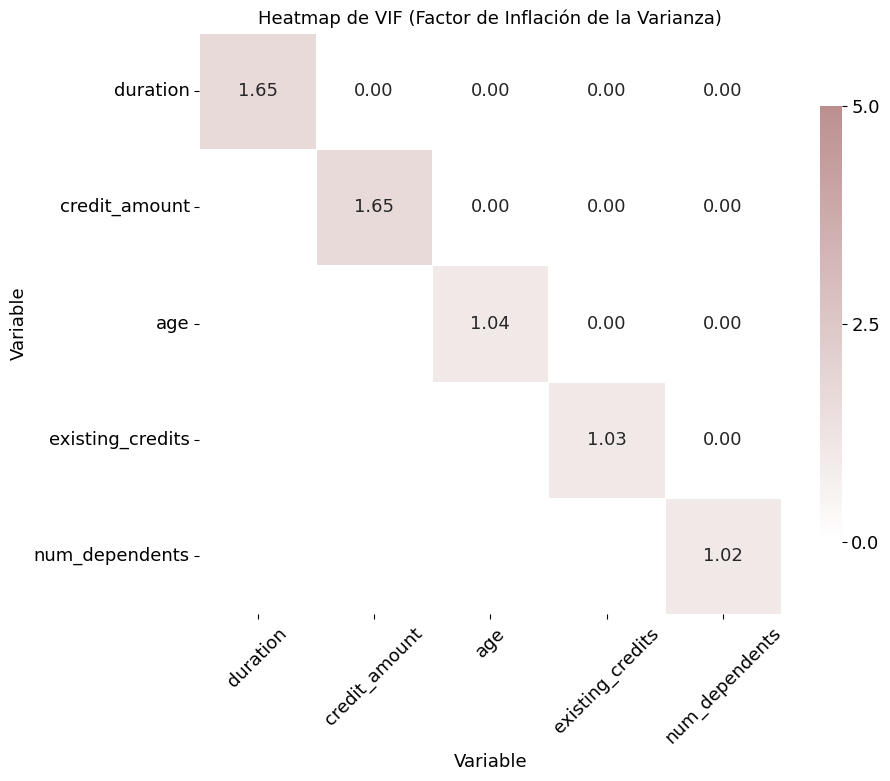

In [15]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Excluimos la constante
vif_values = vif_data[vif_data["Variable"] != "const"].set_index("Variable")["VIF"]

# Creamos matriz diagonal con los VIFs
vif_matrix = pd.DataFrame(
    np.zeros((len(vif_values), len(vif_values))),
    index=vif_values.index,
    columns=vif_values.index
)
np.fill_diagonal(vif_matrix.values, vif_values)

mask = np.tril(np.ones_like(vif_matrix, dtype=bool), k=-1)
cmap = LinearSegmentedColormap.from_list('vif_scale', ['white', '#BC8F8F'])
norm = Normalize(vmin=0, vmax=5)

# Dibujar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    vif_matrix,
    mask=mask,
    cmap=cmap,
    norm=norm,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75, "ticks": [0, 2.5, 5]}
)
plt.title("Heatmap de VIF (Factor de Inflación de la Varianza)", fontsize=13)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Para facilitar la presentación de estos dos gráficos en el trabajo, vamos a presentarlos juntos de la siguiente manera:

C:\Users\sbenitez\AppData\Local\Temp\ipykernel_88068\2997841350.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


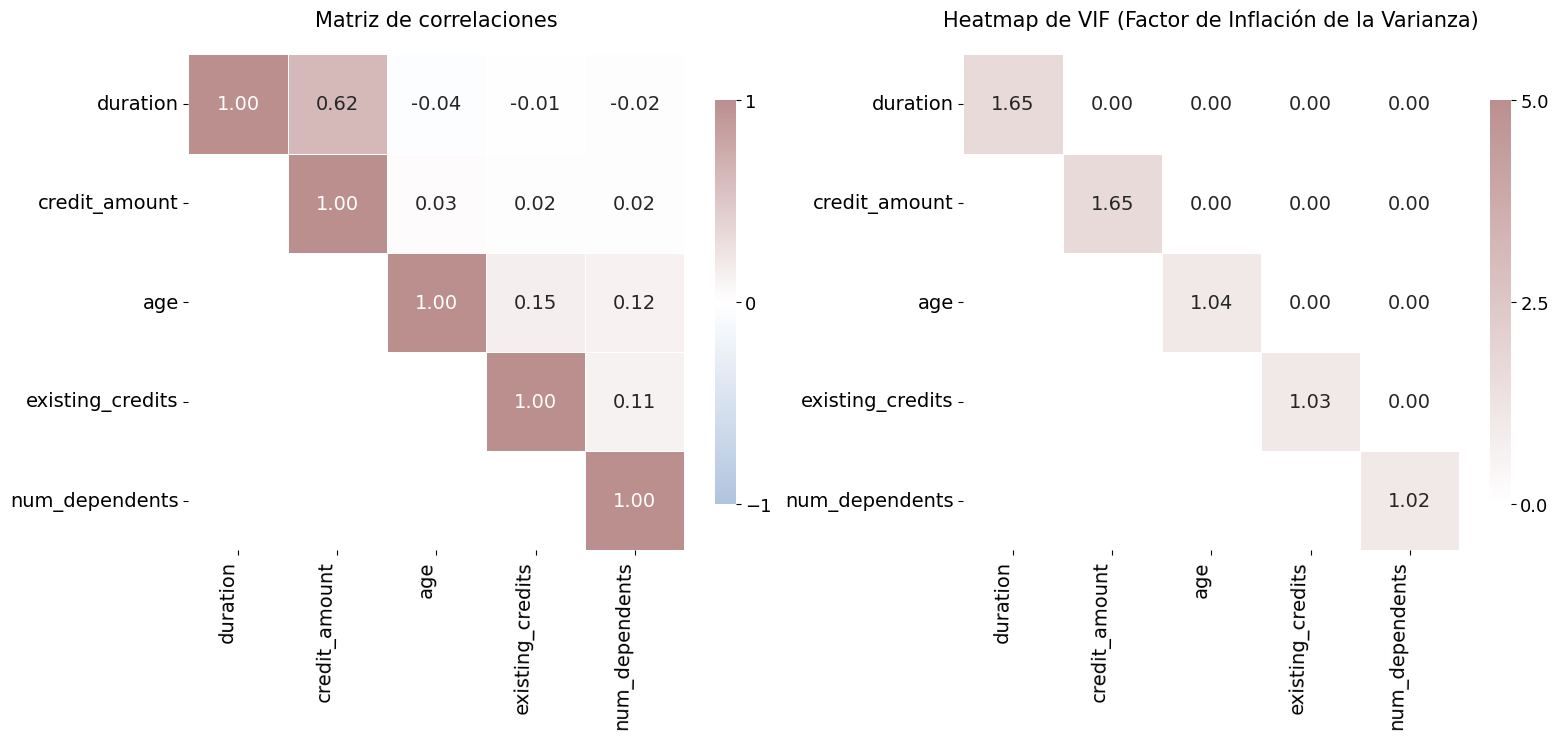

In [16]:
# Variables no ordinales
variables_no_ordinales = ['duration', 'credit_amount', 'age', 'existing_credits', 'num_dependents']

# Matriz de correlaciones
corr_matrix = df_raw[variables_no_ordinales].corr()
mask_corr = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)

cmap_corr = LinearSegmentedColormap.from_list('custom_diverging', ['lightsteelblue', 'white', '#BC8F8F'])
norm_corr = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

# Matriz de VIFs
vif_values = vif_data[vif_data["Variable"] != "const"].set_index("Variable")["VIF"]
vif_matrix = pd.DataFrame(
    np.zeros((len(vif_values), len(vif_values))),
    index=vif_values.index,
    columns=vif_values.index
)
np.fill_diagonal(vif_matrix.values, vif_values)
mask_vif = np.tril(np.ones_like(vif_matrix, dtype=bool), k=-1)

cmap_vif = LinearSegmentedColormap.from_list('vif_scale', ['white', '#BC8F8F'])
norm_vif = Normalize(vmin=0, vmax=5)


fig, axes = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'wspace': 0.25})

# Heatmap de correlaciones 
sns.heatmap(
    corr_matrix,
    mask=mask_corr,
    cmap=cmap_corr,
    norm=norm_corr,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    annot_kws={"fontsize": 14},
    cbar_kws={"shrink": 0.75, "ticks": [-1, 0, 1]},
    ax=axes[0]
)
axes[0].set_title("Matriz de correlaciones", fontsize=15, pad=20)
axes[0].tick_params(labelsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=89, ha='right')
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

# Heatmap de VIFs
sns.heatmap(
    vif_matrix,
    mask=mask_vif,
    cmap=cmap_vif,
    norm=norm_vif,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    annot_kws={"fontsize": 14},
    cbar_kws={"shrink": 0.75, "ticks": [0, 2.5, 5]},
    ax=axes[1]
)
axes[1].set_title("Heatmap de VIF (Factor de Inflación de la Varianza)", fontsize=15, pad=20)
axes[1].tick_params(labelsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=89, ha='right')
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

# Eliminanos los títulos de ejes en el heatmap de VIFs
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

A continuación estudiamos la variable personal_status haciendo uso de diagramas de violin

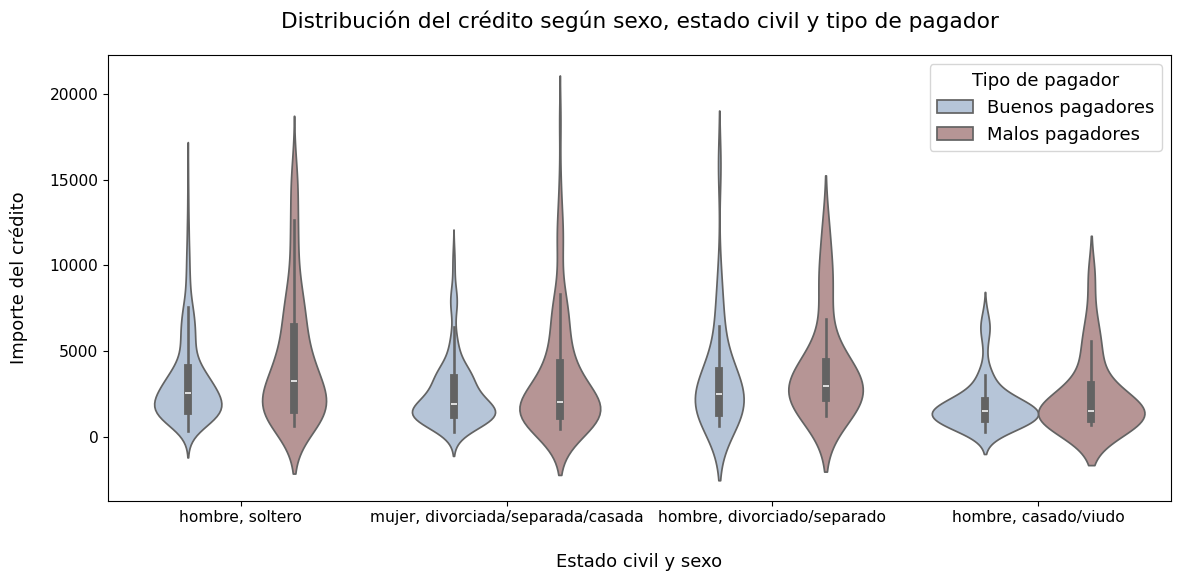

In [17]:
# Creamos un diccionario para mapear las categorías a sus descripciones
personal_status_labels = {
    'A91': 'hombre, divorciado/separado',
    'A92': 'mujer, divorciada/separada/casada',
    'A93': 'hombre, soltero',
    'A94': 'hombre, casado/viudo',
    'A95': 'mujer, soltera'
}

# Crear copia del DataFrame con columnas adicionales para etiquetas y clases
df_violin = df_raw.copy()
df_violin['Estado civil y sexo'] = df_violin['personal_status'].map(personal_status_labels)
df_violin['Tipo de pagador'] = df_violin['credit'].map({1: 'Buenos pagadores', 2: 'Malos pagadores'})

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='Estado civil y sexo',
    y='credit_amount',
    hue='Tipo de pagador',
    data=df_violin,
    split=False,
    palette={'Buenos pagadores': 'lightsteelblue', 'Malos pagadores': '#BC8F8F'}
)

# Ajustes estéticos
plt.xlabel('Estado civil y sexo', labelpad=20)
plt.ylabel('Importe del crédito', labelpad=15)
plt.title('Distribución del crédito según sexo, estado civil y tipo de pagador', pad=20)
plt.tick_params(axis='both', labelsize=11.2)
plt.xticks(rotation=0)
plt.legend(title='Tipo de pagador')
plt.tight_layout()
plt.show()

In [18]:
conteos_combinaciones = df_raw.groupby(['cheking_status', 'savings']).size().unstack(fill_value=0)
display(conteos_combinaciones)

savings,A61,A62,A63,A64,A65
cheking_status,,,,,
A11,219,12,8,6,29
A12,152,47,11,14,45
A13,41,5,4,3,10
A14,191,39,40,25,99


Para continuar con el análisis, estudiamos la distribución de buenos y malos pagadores en función del saldo en la cuenta corriente y de ahorros

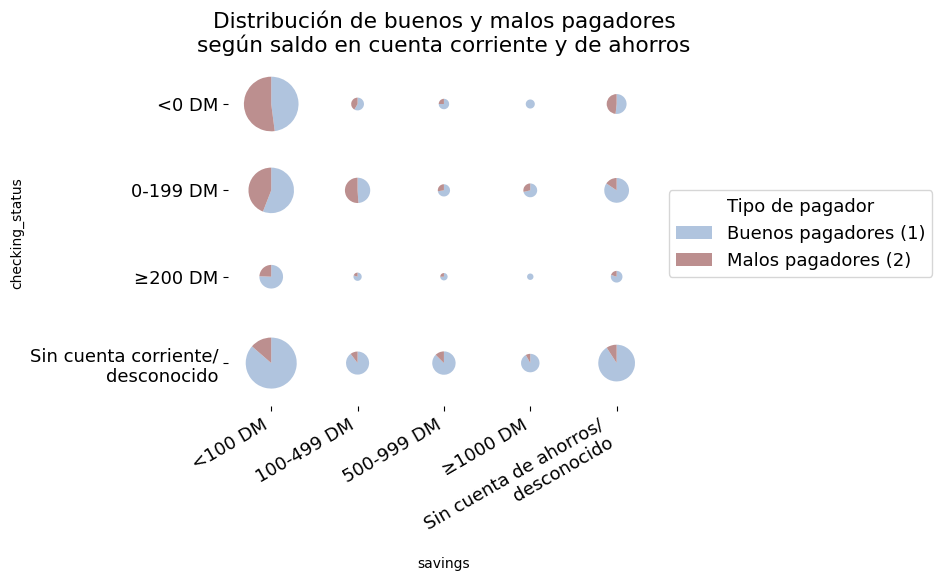

In [19]:
import matplotlib.pyplot as plt

# Mapeos de etiquetas
checking_labels = {
    'A11': '<0 DM',
    'A12': '0-199 DM',
    'A13': '≥200 DM',
    'A14': 'Sin cuenta corriente/\ndesconocido'
}

savings_labels = {
    'A61': '<100 DM',
    'A62': '100-499 DM',
    'A63': '500-999 DM',
    'A64': '≥1000 DM',
    'A65': 'Sin cuenta de ahorros/\ndesconocido'
}

# Creamos copia del dataframe con etiquetas
df_bubble = df_raw.copy()
df_bubble['checking_label'] = df_bubble['cheking_status'].map(checking_labels)
df_bubble['savings_label'] = df_bubble['savings'].map(savings_labels)
df_bubble['Tipo de pagador'] = df_bubble['credit'].map({1: 'Buenos pagadores (1)', 2: 'Malos pagadores (2)'})

# Conteos por combinación
conteos = df_bubble.groupby(['checking_label', 'savings_label', 'Tipo de pagador']).size().unstack(fill_value=0)
conteos_total = conteos.sum(axis=1)

max_size = 1000  # Tamaño máximo del círculo
sizes = (conteos_total / conteos_total.max()) * max_size
fig, ax = plt.subplots(figsize=(10, 6))

checking_vals = df_bubble['checking_label'].unique()
savings_vals = df_bubble['savings_label'].unique()

checking_vals_sorted = [checking_labels[k] for k in ['A11', 'A12', 'A13', 'A14']]
savings_vals_sorted = [savings_labels[k] for k in ['A61', 'A62', 'A63', 'A64', 'A65']]

for i, ch in enumerate(checking_vals_sorted):
    for j, sa in enumerate(savings_vals_sorted):
        try:
            buenos = conteos.loc[(ch, sa)]['Buenos pagadores (1)']
        except KeyError:
            buenos = 0
        try:
            malos = conteos.loc[(ch, sa)]['Malos pagadores (2)']
        except KeyError:
            malos = 0

        total = buenos + malos
        if total == 0:
            continue

        frac_buenos = buenos / total
        size = (total / conteos_total.max()) * max_size

        # Pie chart en coordenadas i,j
        wedges, _ = ax.pie(
            [buenos, malos],
            colors=['lightsteelblue', '#BC8F8F'],
            startangle=90,
            counterclock=False,
            radius=(size ** 0.5) / 100,  # convertir área a radio
            center=(j, -i)
        )

# Ejes y etiquetas
ax.set_xticks(range(len(savings_vals_sorted)))
ax.set_xticklabels(savings_vals_sorted, rotation=30, ha='right')
ax.set_yticks([-i for i in range(len(checking_vals_sorted))])
ax.set_yticklabels(checking_vals_sorted)

ax.set_title("Distribución de buenos y malos pagadores\nsegún saldo en cuenta corriente y de ahorros")
ax.legend(wedges, ['Buenos pagadores (1)', 'Malos pagadores (2)'], 
          title="Tipo de pagador",
          loc='center left', 
          bbox_to_anchor=(1, 0.5))
ax.set_xlim(-0.5, len(savings_vals_sorted) - 0.5)
ax.set_ylim(-len(checking_vals_sorted) + 0.5, 0.5)

ax.set_xlabel("savings", fontsize=10)
ax.set_ylabel("checking_status", fontsize=10)

# Ajustamos el layout para que quepa la leyenda
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

Finalizando el análisis exploratorio y previo a la aplicación algorítmica, hacemos uso del siguiente gráfico para estudiar las variables que consideraremos como atributos sensibles

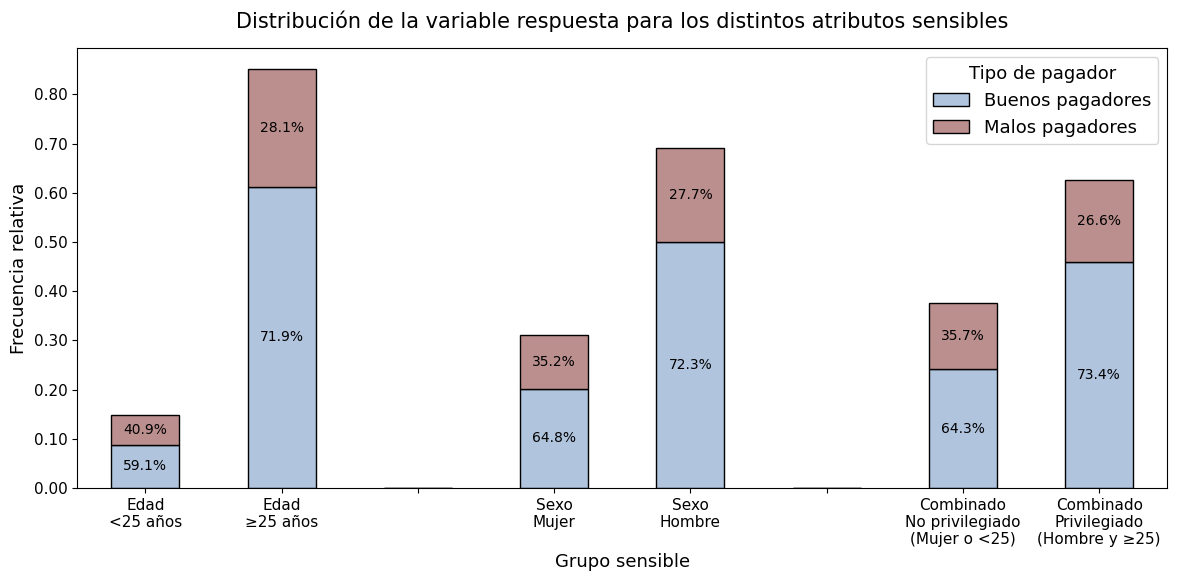

In [20]:
df_plot = df_raw.copy()
df_plot['Grupo edad'] = df_plot['age'].apply(lambda x: '<25 años' if x < 25 else '≥25 años')
df_plot['Sexo'] = df_plot['personal_status'].apply(lambda x: 'Mujer' if x in ['A92', 'A95'] else 'Hombre')
df_plot['Grupo combinado'] = df_plot.apply(
    lambda row: 'No privilegiado\n(Mujer o <25)' if (row['age'] < 25 or row['Sexo'] == 'Mujer') else 'Privilegiado\n(Hombre y ≥25)',
    axis=1
)
df_plot['Pagador'] = df_plot['credit'].map({1: 'Buenos pagadores', 2: 'Malos pagadores'})

def preparar_datos_barra(grupo_col):
    conteo = df_plot.groupby([grupo_col, 'Pagador']).size().unstack().fillna(0)
    total = conteo.sum().sum()
    proporciones = conteo / total
    return proporciones, conteo

edad_bar, edad_count = preparar_datos_barra('Grupo edad')
sexo_bar, sexo_count = preparar_datos_barra('Sexo')
combinado_bar, combinado_count = preparar_datos_barra('Grupo combinado')

df_comb = pd.concat([
    edad_bar.rename(index=lambda x: f'Edad\n{x}'),
    sexo_bar.rename(index=lambda x: f'Sexo\n{x}'),
    combinado_bar.rename(index=lambda x: f'Combinado\n{x}')
])
df_count = pd.concat([
    edad_count.rename(index=lambda x: f'Edad\n{x}'),
    sexo_count.rename(index=lambda x: f'Sexo\n{x}'),
    combinado_count.rename(index=lambda x: f'Combinado\n{x}')
])

for sep in ['sep1', 'sep2']:
    df_comb.loc[sep] = [0, 0]
    df_count.loc[sep] = [0, 0]

orden = [
    'Edad\n<25 años', 'Edad\n≥25 años',
    'sep1',
    'Sexo\nMujer', 'Sexo\nHombre',
    'sep2',
    'Combinado\nNo privilegiado\n(Mujer o <25)', 'Combinado\nPrivilegiado\n(Hombre y ≥25)'
]
df_comb = df_comb.loc[orden]
df_count = df_count.loc[orden]

# Creamos el gráfico
formatter = FuncFormatter(lambda y, _: f'{y:.2f}')
colors = ['lightsteelblue', '#BC8F8F']
ax = df_comb.plot(kind='bar', stacked=True, color=colors, edgecolor='black', figsize=(12, 6))

ax.set_ylabel('Frecuencia relativa')
ax.set_title('Distribución de la variable respuesta para los distintos atributos sensibles', fontsize=15, pad=15)
ax.set_xlabel('Grupo sensible', fontsize=13)
ax.tick_params(labelsize=11)
ax.yaxis.set_major_formatter(formatter)
ax.legend(title='Tipo de pagador', loc='upper right')


etiquetas = [label.get_text() if 'sep' not in label.get_text() else '' for label in ax.get_xticklabels()]
ax.set_xticklabels(etiquetas, rotation=0)

# Añadir texto dentro de cada barra
for i, (idx, row) in enumerate(df_comb.iterrows()):
    if 'sep' in idx:
        continue
    total = df_count.loc[idx].sum()
    y_bottom = 0
    for clase in ['Buenos pagadores', 'Malos pagadores']:
        valor = df_comb.loc[idx, clase]
        porcentaje = df_count.loc[idx, clase] / total * 100
        if valor > 0:
            ax.text(i, y_bottom + valor / 2, f'{porcentaje:.1f}%', ha='center', va='center', fontsize=10)
        y_bottom += valor

plt.tight_layout()
plt.show()

## Aplicación algorítmica

In [21]:
# Con esta celda, podemos hacer cambios en cualquier script/libreria y verlo reflejado en las funciones del notebook.
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
## CARGAMOS LIBRERIAS
# Obs: La primera vez puede tardar en cargar porque AIF360 pre-compila algunas cosas de tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos librerías de sklearn
# vanilla LR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Cargamos xgboost
from xgboost import XGBClassifier

# Cargamos algoritmos de fairness
# Pre-procesado
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.preprocessing import DisparateImpactRemover
# In-procesado
from aif360.algorithms.inprocessing import PrejudiceRemover
from aif360.algorithms.inprocessing.adversarial_debiasing import AdversarialDebiasing
# Post-procesado
from aif360.algorithms.postprocessing import RejectOptionClassification # when scores are given

from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing # when scores (R) are given
from aif360.algorithms.postprocessing import EqOddsPostprocessing # when labels (Y^hat) are given
from aif360.datasets import GermanDataset

# TF para adversarial debiasing
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from IPython.display import Markdown, display

# Librería local con funciones de ayuda extra
import utils

seed = 12345 # fijamos la semilla de números aleatorios para reproducir exactamante el notebook

c:\Users\sbenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\inFairness\utils\ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
c:\Users\sbenitez\AppData\Local\Programs\Python\Python312\Lib\site-packages\inFairness\utils\ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.

In [24]:
# Para separar el sexo de personal_status y añadirlo como una variable independiente al modelo
def custom_preprocessing(df):
    # Normalizamos el código a mayúsculas y mapeamos
    mapping = {
        'A91': 1,  # male: divorced/separated
        'A93': 1,  # male: single
        'A94': 1,  # male: married/widowed
        'A92': 0,  # female: divorced/separated/married
        'A95': 0   # female: single
    }
    df['sex'] = df['personal_status'].str.upper().map(mapping)

    # Si queremos descartarla después aquí, podemos hacerlo. Pero en este caso lo haremos en features_to_drop
    # df = df.drop(columns=['personal_status'])
    return df

dataset_german = GermanDataset(
    protected_attribute_names=['age'],             # solo edad como atributo sensible
    privileged_classes=[lambda x: x >= 25],       
    features_to_drop=['personal_status','foreign_worker'],
    custom_preprocessing=custom_preprocessing
)
    
# xgboost requiere que los labels empiecen en 0, y en este conjunto empiezan en 1
dataset_german.labels[dataset_german.labels.ravel() == 2] =  dataset_german.labels[dataset_german.labels.ravel() == 2] - 2
dataset_german.unfavorable_label = dataset_german.unfavorable_label - 2
    
# Separamos el conjunto de datos en train, validate, test
data_train, vt = dataset_german.split([0.7], shuffle=True, seed=seed)
data_val, data_test = vt.split([0.5], shuffle=True, seed=seed)

# Obtenemos los indicadores del grupo sensible
sensitive_attribute = dataset_german.protected_attribute_names[0] # age
privileged_groups, unprivileged_groups = utils.get_privileged_groups(dataset_german)
    
print(f'Dimensiones del conjunto de datos: {dataset_german.features.shape}')
print("Grupos privilegiados:", privileged_groups)
print("Grupos no privilegiados:", unprivileged_groups)
print("Label del grupo favorable:", dataset_german.favorable_label)
print("Label del grupo desfavorable:", dataset_german.unfavorable_label) 

Dimensiones del conjunto de datos: (1000, 56)
Grupos privilegiados: [{'age': np.float64(1.0)}]
Grupos no privilegiados: [{'age': np.float64(0.0)}]
Label del grupo favorable: 1.0
Label del grupo desfavorable: 0.0


In [25]:
# Vamos a ver los nombres de las columnas que tiene el dataset resultante
print(dataset_german.feature_names)

['month', 'credit_amount', 'investment_as_income_percentage', 'residence_since', 'age', 'number_of_credits', 'people_liable_for', 'sex', 'status=A11', 'status=A12', 'status=A13', 'status=A14', 'credit_history=A30', 'credit_history=A31', 'credit_history=A32', 'credit_history=A33', 'credit_history=A34', 'purpose=A40', 'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43', 'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48', 'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63', 'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72', 'employment=A73', 'employment=A74', 'employment=A75', 'other_debtors=A101', 'other_debtors=A102', 'other_debtors=A103', 'property=A121', 'property=A122', 'property=A123', 'property=A124', 'installment_plans=A141', 'installment_plans=A142', 'installment_plans=A143', 'housing=A151', 'housing=A152', 'housing=A153', 'skill_level=A171', 'skill_level=A172', 'skill_level=A173', 'skill_level=A174', 'telephone=A191', 'telephone=A192']


In [26]:
# Para comprobar que hemos añadido la variable sex correctamente vamos a ver cuantos hombres y mujeres hay:
df = dataset_german.convert_to_dataframe()[0]
print(df['sex'].unique())        # Muestra los valores únicos
print(df['sex'].value_counts())  # Muestra el recuento de cada valor

[1. 0.]
sex
1.0    690
0.0    310
Name: count, dtype: int64


In [27]:
print(df['age'].unique())        # Muestra los valores únicos
print(df['age'].value_counts()) 

[1. 0.]
age
1.0    851
0.0    149
Name: count, dtype: int64


In [28]:
# Inicializamos diccionarios
models = dict()

# Rango de umbrales para evaluar el score de los modelos
thresh_sweep = np.linspace(0.01, 1.0, 50)

metrics_sweep = dict()

# Store results from validation and test
metrics_best_thresh_validate = dict()
metrics_best_thresh_test = dict()

In [29]:
%%time 

# Nombramos al modelo
model_name = 'logistic_regression'
fairness_method = ''

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Parámetros del modelo
fit_params = {'logisticregression__sample_weight': data_train_copy.instance_weights}

# Asignamos el modelo al diccionario
models[model_name+fairness_method] = make_pipeline(
            #StandardScaler(),
            LogisticRegression(solver='liblinear', random_state=seed))

# Entrenamos el modelo
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy.features, data_train_copy.labels.ravel(), **fit_params)

CPU times: total: 0 ns
Wall time: 6.51 ms


**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.7778
AUC: 0.7398
Balanced accuracy: 0.6851
Accuracy: 0.6533
Independence ( |ΔP(Y_pred = 1)| ): 0.3000
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1784
Sufficiency ( |ΔPPV| ) : 0.3615
CPU times: total: 125 ms
Wall time: 128 ms


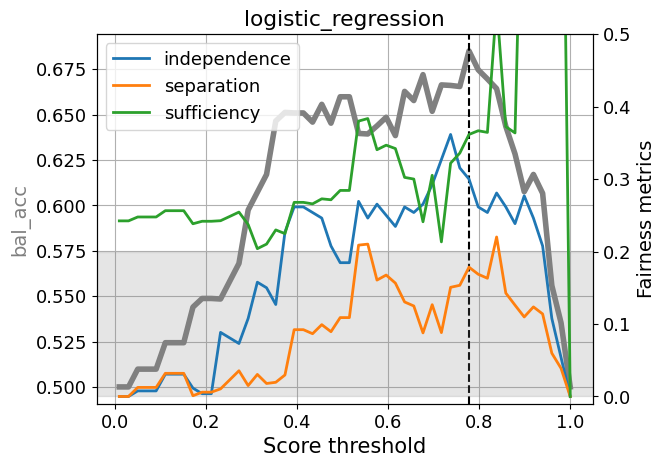

In [30]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

In [31]:
display(Markdown("**Test set results**"))
utils.print_metrics(metrics_best_thresh_test[model_name+fairness_method])

**Test set results**

Threshold corresponding to *best balanced accuracy*: 0.7778
AUC: 0.7539
Balanced accuracy: 0.7012
Accuracy: 0.6400
Independence ( |ΔP(Y_pred = 1)| ): 0.1501
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1266
Sufficiency ( |ΔPPV| ) : 0.2088


In [32]:
%%time 

# Nombramos al modelo
model_name = 'xgb_classifier'
fairness_method = ''

# Parámetros del modelo
fit_params = {'eval_metric': 'error', 'eta':0.1, 'max_depth':6, 'subsample':0.8}

# Asignamos el modelo al diccionario
models[model_name+fairness_method] = XGBClassifier(**fit_params)

# Entrenamos el modelo
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy.features, data_train_copy.labels.ravel())

CPU times: total: 625 ms
Wall time: 229 ms


**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7352
Balanced accuracy: 0.6970
Accuracy: 0.7067
Independence ( |ΔP(Y_pred = 1)| ): 0.2231
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0558
Sufficiency ( |ΔPPV| ) : 0.2022
CPU times: total: 625 ms
Wall time: 114 ms


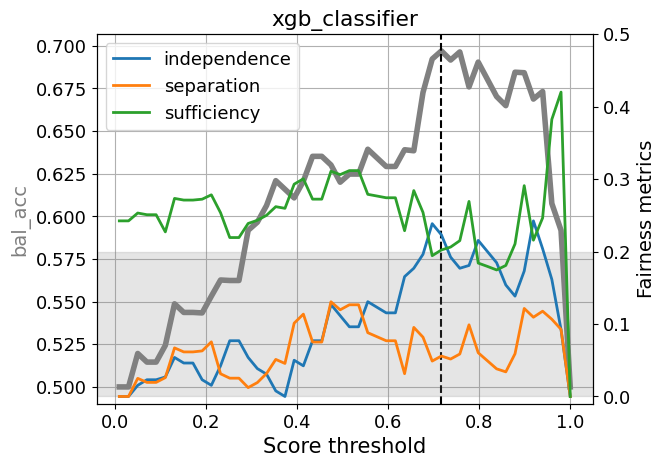

In [33]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

In [34]:
display(Markdown("**Test set results**"))
utils.print_metrics(metrics_best_thresh_test[model_name+fairness_method])

**Test set results**

Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7521
Balanced accuracy: 0.7040
Accuracy: 0.6933
Independence ( |ΔP(Y_pred = 1)| ): 0.1414
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0490
Sufficiency ( |ΔPPV| ) : 0.1299


## Técnicas de preprocesadmiento

### Reweighting

In [35]:
%%time 
# Nombramos al modelo
fairness_method = '_reweighting'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos el pre-procesado al conjunto train
# Inicializamos la clase de pre-procesado 
PreProcessor = Reweighing(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)
# Pre-procesamos (modifica los datos)
PreProcessor.fit(data_train_copy)
data_train_copy = PreProcessor.transform(data_train_copy)
data_val_copy = PreProcessor.transform(data_val_copy)
data_test_copy = PreProcessor.transform(data_test_copy)

CPU times: total: 0 ns
Wall time: 9.57 ms


De aquí en adelante, se aplica el modelo de preferencia de manera estándar

**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.7778
AUC: 0.7316
Balanced accuracy: 0.6873
Accuracy: 0.6568
Independence ( |ΔP(Y_pred = 1)| ): 0.2295
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1229
Sufficiency ( |ΔPPV| ) : 0.1660
CPU times: total: 141 ms
Wall time: 136 ms


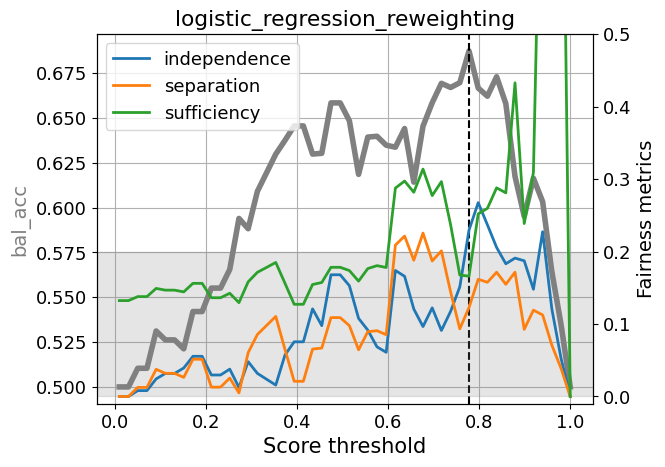

In [36]:
%%time 

# Regresión logística
model_name = 'logistic_regression'

# Parámetros del modelo
fit_params = {'logisticregression__sample_weight': data_train_copy.instance_weights}

# Asignamos el modelo al diccionario
models[model_name+fairness_method] = make_pipeline(
            #StandardScaler(),
            LogisticRegression(solver='liblinear', random_state=seed))

# Entrenamos el modelo
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy.features, data_train_copy.labels.ravel(), **fit_params)

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.7576
AUC: 0.7352
Balanced accuracy: 0.6948
Accuracy: 0.6917
Independence ( |ΔP(Y_pred = 1)| ): 0.1440
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0586
Sufficiency ( |ΔPPV| ) : 0.1212
CPU times: total: 1.39 s
Wall time: 260 ms


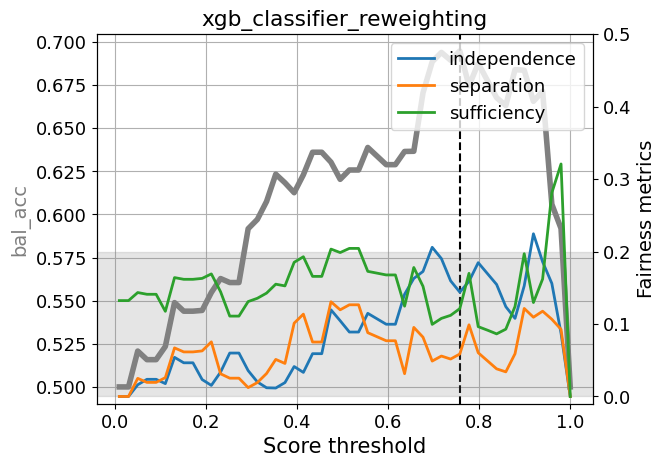

In [37]:
%%time 

# Nombramos al modelo
model_name = 'xgb_classifier'

# Parámetros del modelo
fit_params = {'eval_metric': 'error', 'eta':0.1, 'max_depth':6, 'subsample':0.8}

# Asignamos el modelo al diccionario
models[model_name+fairness_method] = XGBClassifier(**fit_params)

# Entrenamos el modelo
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy.features, data_train_copy.labels.ravel())

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

### Disparate Impact Remover

In [38]:
%%time 
# Nombramos al modelo
fairness_method = '_di_remover'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Parámetros del modelo
nivel_reparacion = 0.5 # un valor 0 inidica ausencia de reparación (datos se mantienen igual) 
                       # un valor 1 indica reparación completa (se puede perder nivel predictivo).
                       # Se puede establecer cualquier valor entre 0 y 1.

# Hacemos el pre-procesado al conjunto train
# Inicializamos la clase de pre-procesado 
PreProcessor = DisparateImpactRemover(
    repair_level=nivel_reparacion,
    sensitive_attribute=sensitive_attribute
)
# Pre-procesamos (modifica los datos)
PreProcessor.fit_transform(data_train_copy)
data_train_copy = PreProcessor.fit_transform(data_train_copy)
data_val_copy = PreProcessor.fit_transform(data_val_copy)
data_test_copy = PreProcessor.fit_transform(data_test_copy)

CPU times: total: 125 ms
Wall time: 129 ms


**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.7576
AUC: 0.7392
Balanced accuracy: 0.6759
Accuracy: 0.6600
Independence ( |ΔP(Y_pred = 1)| ): 0.3538
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1631
Sufficiency ( |ΔPPV| ) : 0.3333
CPU times: total: 219 ms
Wall time: 196 ms


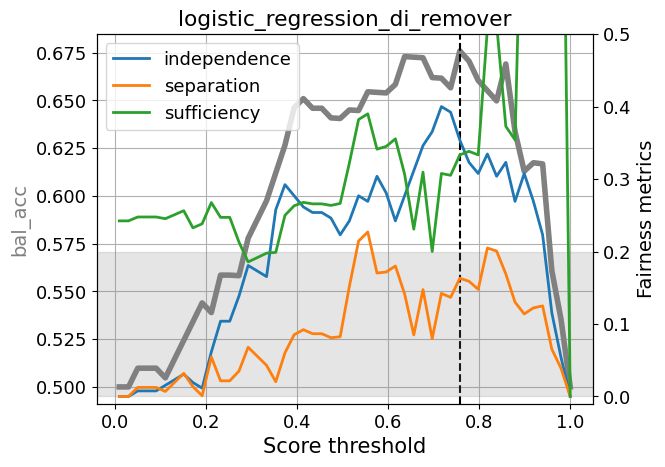

In [39]:
%%time 
# Regresión logística
model_name = 'logistic_regression'

# Parámetros del modelo
fit_params = {'logisticregression__sample_weight': data_train_copy.instance_weights}

# Asignamos el modelo al diccionario
models[model_name+fairness_method] = make_pipeline(
            #StandardScaler(),
            LogisticRegression(solver='liblinear', random_state=seed))

# Entrenamos el modelo
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy.features, data_train_copy.labels.ravel(), **fit_params)

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.6969
AUC: 0.7411
Balanced accuracy: 0.6925
Accuracy: 0.7133
Independence ( |ΔP(Y_pred = 1)| ): 0.3192
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1086
Sufficiency ( |ΔPPV| ) : 0.2447
CPU times: total: 938 ms
Wall time: 247 ms


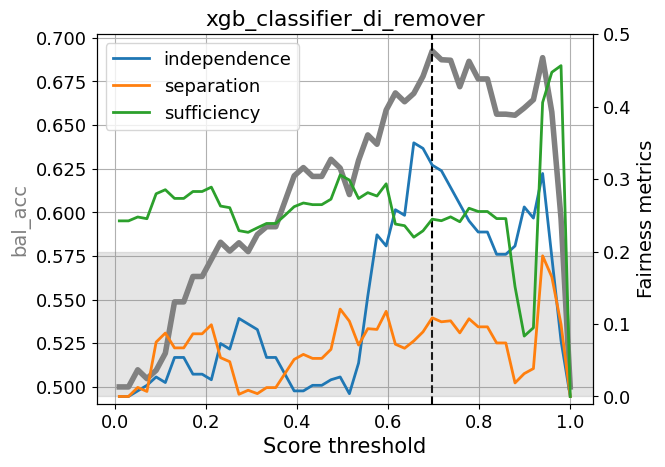

In [40]:
%%time 

# Nombramos al modelo
model_name = 'xgb_classifier'

# Parámetros del modelo
fit_params = {'eval_metric': 'error', 'eta':0.1, 'max_depth':6, 'subsample':0.8}

# Asignamos el modelo al diccionario
models[model_name+fairness_method] = XGBClassifier(**fit_params)

# Entrenamos el modelo
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy.features, data_train_copy.labels.ravel())

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])


# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

## Técnicas de Procesamiento Interno

### Prejudice Remover

In [41]:
%%time 
# Nombramos al modelo
model_name = 'prejudice_remover'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Parámetros del modelo
η = 50.0 # hyper-parameter de regularización

# Inicializamos el modelo y lo asignamos al diccionario
models[model_name] = PrejudiceRemover(sensitive_attr=sensitive_attribute, eta=η)

# Entrenamos el modelo
models[model_name] = models[model_name].fit(data_train_copy)

CPU times: total: 15.6 ms
Wall time: 3.03 s


**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.8182
AUC: 0.7378
Balanced accuracy: 0.6848
Accuracy: 0.6467
Independence ( |ΔP(Y_pred = 1)| ): 0.2192
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1187
Sufficiency ( |ΔPPV| ) : 0.2689
CPU times: total: 125 ms
Wall time: 4.1 s


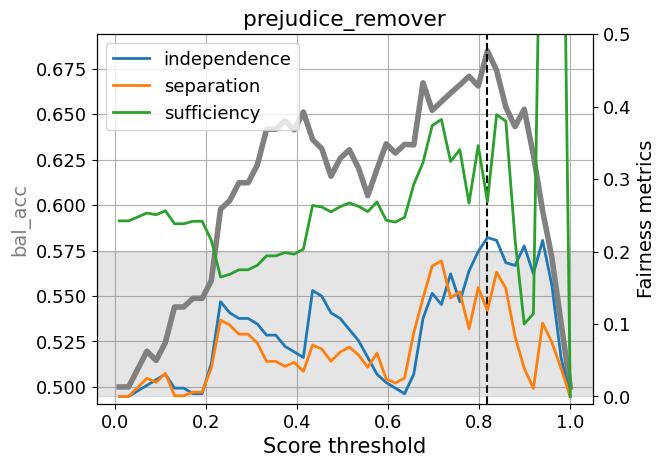

In [42]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name] = utils.describe_metrics(metrics_sweep[model_name])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name], 
    threshold=metrics_best_thresh_validate[model_name]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name])

# Graficamos el comportamiento del modelo para el rango de umbrales 
f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name])
a.set_title(model_name)
f

### Adversarial Debiasing

In [43]:
%%time

# Nombramos al modelo
model_name = 'NN_adversarial_debiasing'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

sess = tf.Session()

models[model_name] = AdversarialDebiasing(
    privileged_groups = privileged_groups,
    unprivileged_groups = unprivileged_groups,
    scope_name = 'debiased_classifier',
    debias=True,
    sess=sess,
    num_epochs=125)

models[model_name].fit(data_train_copy)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

epoch 0; iter: 0; batch classifier loss: 78.422424; batch adversarial loss: 0.583231
epoch 1; iter: 0; batch classifier loss: 78.335861; batch adversarial loss: 0.612050
epoch 2; iter: 0; batch classifier loss: 35.943745; batch adversarial loss: 0.572575
epoch 3; iter: 0; batch classifier loss: 39.408211; batch adversarial loss: 0.530934
epoch 4; iter: 0; batch classifier loss: 36.602859; batch adversarial loss: 0.544909
epoch 5; iter: 0; batch classifier loss: 53.008183; batch adversarial loss: 0.531577
epoch 6; iter: 0; batch classifier loss: 51.049362; batch adversarial loss: 0.575458
epoch 7; iter: 0; batch classifier loss: 39.165993; batch adversarial loss: 0.543930
epoch 8; iter: 0; batch classifier loss: 42.423855; batch adversarial loss: 0.571097
epoch 9; iter: 0; batch classifier loss: 41.866512; batch adversarial loss: 0.531319
epoch 10; iter: 0; batch classifie

**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.3939
AUC: 0.4906
Balanced accuracy: 0.5624
Accuracy: 0.6733
Independence ( |ΔP(Y_pred = 1)| ): 0.1923
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0221
Sufficiency ( |ΔPPV| ) : 0.2155
CPU times: total: 141 ms
Wall time: 138 ms


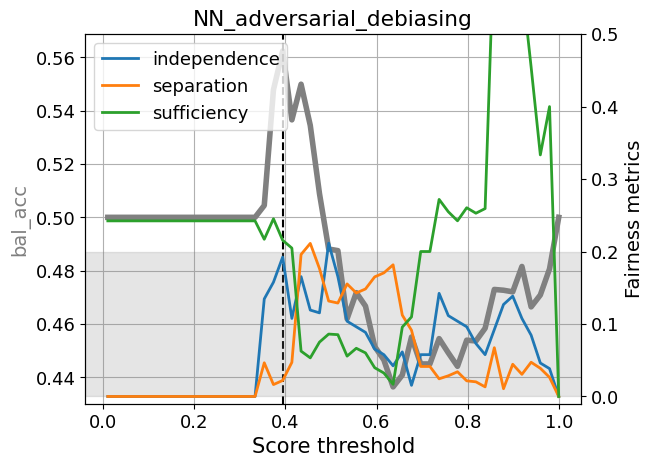

In [44]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name] = utils.describe_metrics(metrics_sweep[model_name])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name], 
    threshold=metrics_best_thresh_validate[model_name]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name])

# Graficamos el comportamiento del modelo para el rango de umbrales 
f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name])
a.set_title(model_name)
f

In [45]:
%%time

sess.close()
tf.reset_default_graph()
sess = tf.Session()

# Nombramos al modelo
model_name = 'Basic_NN_no_adversarial_debiasing'

# Hacemos una copia de los datasets"
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

models[model_name] = AdversarialDebiasing(privileged_groups = privileged_groups,
                                          unprivileged_groups = unprivileged_groups,
                                          scope_name = 'biased_classifier',
                                          debias=False,
                                          sess=sess,
                                          num_epochs=125)
models[model_name].fit(data_train_copy)

epoch 0; iter: 0; batch classifier loss: 97.722305
epoch 1; iter: 0; batch classifier loss: 70.341736
epoch 2; iter: 0; batch classifier loss: 83.107796
epoch 3; iter: 0; batch classifier loss: 27.732662
epoch 4; iter: 0; batch classifier loss: 55.306976
epoch 5; iter: 0; batch classifier loss: 65.411713
epoch 6; iter: 0; batch classifier loss: 33.397758
epoch 7; iter: 0; batch classifier loss: 58.536102
epoch 8; iter: 0; batch classifier loss: 52.908989
epoch 9; iter: 0; batch classifier loss: 42.473068
epoch 10; iter: 0; batch classifier loss: 44.291695
epoch 11; iter: 0; batch classifier loss: 55.827930
epoch 12; iter: 0; batch classifier loss: 54.264137
epoch 13; iter: 0; batch classifier loss: 48.743980
epoch 14; iter: 0; batch classifier loss: 57.999191
epoch 15; iter: 0; batch classifier loss: 28.089159
epoch 16; iter: 0; batch classifier loss: 35.810005
epoch 17; iter: 0; batch classifier loss: 33.735287
epoch 18; iter: 0; batch classifier loss: 44.953415
epoch 19; iter: 0; bat

**Validation set results**

Threshold corresponding to *best balanced accuracy*: 0.4747
AUC: 0.7152
Balanced accuracy: 0.6863
Accuracy: 0.6800
Independence ( |ΔP(Y_pred = 1)| ): 0.1038
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1054
Sufficiency ( |ΔPPV| ) : 0.2917
CPU times: total: 203 ms
Wall time: 206 ms


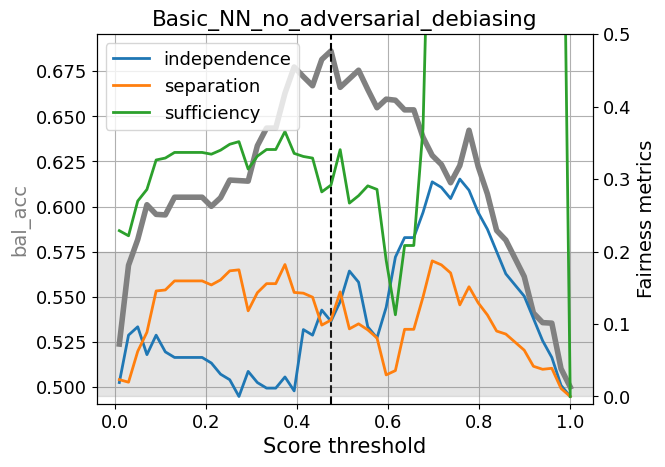

In [46]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name] = utils.metrics_threshold_sweep(
    dataset=data_val_copy,
    model=models[model_name],
    thresh_arr=thresh_sweep
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name] = utils.describe_metrics(metrics_sweep[model_name])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name] = utils.compute_metrics(
    dataset=data_test_copy, 
    model=models[model_name], 
    threshold=metrics_best_thresh_validate[model_name]['best_threshold'])

display(Markdown("**Validation set results**"))
utils.print_metrics(metrics_best_thresh_validate[model_name])

# Graficamos el comportamiento del modelo para el rango de umbrales 
f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name])
a.set_title(model_name)
f

## Técnicas de Postprocesamiento

### Equalized Odds

#### Usando labels

In [47]:
%%time 
# Nombramos al modelo
fairness_method = '_equal_odds'
# Nombre del modelo al que le aplicaremos post-processing
model_name = 'logistic_regression'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos una copia de las predicciones del modelo de referencia
data_train_preds = utils.update_dataset_from_model(data_train_copy, models[model_name])
data_val_preds = utils.update_dataset_from_model(data_val_copy, models[model_name])
data_test_preds = utils.update_dataset_from_model(data_test_copy, models[model_name])


# Inicializamos el modelo (dadas las predicciones, no los scores) y lo asignamos al diccionario
models[model_name+fairness_method] = EqOddsPostprocessing(
    privileged_groups = privileged_groups,
    unprivileged_groups = unprivileged_groups,
    # cost_constraint = quality,
    seed = seed)

# Realizamos el post-procesado en función de las clases realies (data_copy) y las predicciones del modelo de referencia (data_preds)
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy, data_train_preds)

CPU times: total: 15.6 ms
Wall time: 18.9 ms


Threshold corresponding to *best balanced accuracy*: 0.8384
AUC: 0.7398
Balanced accuracy: 0.6842
Accuracy: 0.6333
Independence ( |ΔP(Y_pred = 1)| ): 0.1154
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0604
Sufficiency ( |ΔPPV| ) : 0.2222


CPU times: total: 266 ms
Wall time: 336 ms


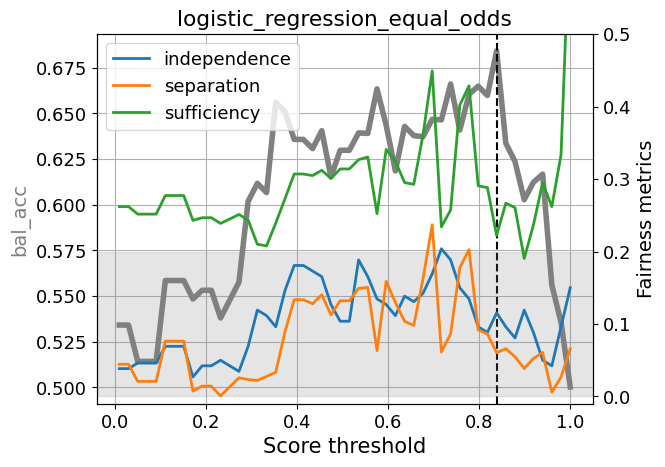

In [48]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_postprocessing_threshold_sweep(
    dataset_true=data_val_copy,
    dataset_preds=data_val_preds,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep,
    scores_or_labels='labels'
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics_postprocessing(
    dataset_true=data_test_copy,
    dataset_preds=data_test_preds,
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'], 
    scores_or_labels='labels')

utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])
print('\n')

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

In [49]:
%%time 
# Nombramos al modelo
fairness_method = '_equal_odds'
# Nombre del modelo al que le aplicaremos post-processing
model_name = 'xgb_classifier'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos una copia de las predicciones del modelo de referencia
data_train_preds = utils.update_dataset_from_model(data_train_copy, models[model_name])
data_val_preds = utils.update_dataset_from_model(data_val_copy, models[model_name])
data_test_preds = utils.update_dataset_from_model(data_test_copy, models[model_name])


# Inicializamos el modelo (dadas las predicciones, no los scores) y lo asignamos al diccionario
models[model_name+fairness_method] = EqOddsPostprocessing(
    privileged_groups = privileged_groups,
    unprivileged_groups = unprivileged_groups,
    # cost_constraint = quality,
    seed = seed)

# Realizamos el post-procesado en función de las clases realies (data_copy) y las predicciones del modelo de referencia (data_preds)
models[model_name+fairness_method] = models[model_name+fairness_method].fit(data_train_copy, data_train_preds)

CPU times: total: 78.1 ms
Wall time: 20.1 ms


Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7352
Balanced accuracy: 0.6970
Accuracy: 0.7067
Independence ( |ΔP(Y_pred = 1)| ): 0.2231
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0558
Sufficiency ( |ΔPPV| ) : 0.2022


CPU times: total: 375 ms
Wall time: 297 ms


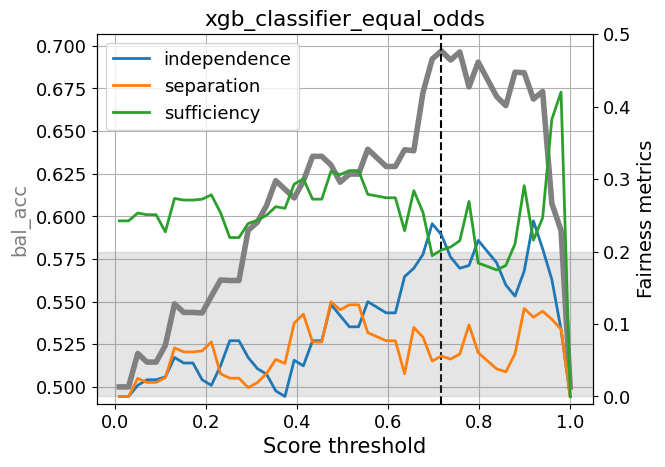

In [50]:
%%time 

# Evaluamos al modelo para un rango de umbrales
metrics_sweep[model_name+fairness_method] = utils.metrics_postprocessing_threshold_sweep(
    dataset_true=data_val_copy,
    dataset_preds=data_val_preds,
    model=models[model_name+fairness_method],
    thresh_arr=thresh_sweep,
    scores_or_labels='labels'
)

# Evaluamos las métricas para el mejor umbral
metrics_best_thresh_validate[model_name+fairness_method] = utils.describe_metrics(metrics_sweep[model_name+fairness_method])

# Usando el mejor umbral, calculamos las métricas en el test set
metrics_best_thresh_test[model_name+fairness_method] = utils.compute_metrics_postprocessing(
    dataset_true=data_test_copy,
    dataset_preds=data_test_preds,
    model=models[model_name+fairness_method], 
    threshold=metrics_best_thresh_validate[model_name+fairness_method]['best_threshold'], 
    scores_or_labels='labels')

utils.print_metrics(metrics_best_thresh_validate[model_name+fairness_method])
print('\n')

# Graficamos el comportamiento del modelo para el rango de umbrales 
# utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
# plt.title(model_name+fairness_method)

f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name+fairness_method])
a.set_title(model_name+fairness_method)
f

#### Usando Scores

In [51]:
%%time 
# Nombramos al modelo
fairness_method = '_equal_odds'
# Nombre del modelo al que le aplicaremos post-processing
model_name = 'logistic_regression'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos una copia de las predicciones del modelo de referencia
data_train_preds = utils.update_dataset_from_model(data_train_copy, models[model_name])
data_val_preds = utils.update_dataset_from_model(data_val_copy, models[model_name])
data_test_preds = utils.update_dataset_from_model(data_test_copy, models[model_name])


# Parámetros del modelo
# métricas fair a optimizar
quality_constraints = ["weighted", 'fnr', 'fpr'] # "weighted" average of fnr and fpr

for quality in quality_constraints:
    # nombramos al modelo con su métrica específica
    model_name_metric = model_name + fairness_method + '_' + quality
    
    # Inicializamos el modelo y lo asignamos al diccionario
    models[model_name_metric] = CalibratedEqOddsPostprocessing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        cost_constraint=quality,
        seed=seed)

    # Realizamos el post-procesado en función de las clases realies (data_copy) y las predicciones del modelo de referencia (data_preds)
    models[model_name_metric] = models[model_name_metric].fit(data_train_copy, data_train_preds)

CPU times: total: 15.6 ms
Wall time: 24.1 ms


In [52]:
display(Markdown("**Validation set results for logistic regression**"))
for key_metric in quality_constraints:
    
    model_name_metric = model_name + fairness_method + '_' + key_metric
    
    print(f'Results for {model_name_metric}')
    
    # Evaluamos al modelo para un rango de umbrales
    metrics_sweep[model_name_metric] = utils.metrics_postprocessing_threshold_sweep(
        dataset_true=data_val_copy,
        dataset_preds=data_val_preds,
        model=models[model_name_metric],
        thresh_arr=thresh_sweep,
        scores_or_labels='scores'
    )

    # Evaluamos las métricas para el mejor umbral
    metrics_best_thresh_validate[model_name_metric] = utils.describe_metrics(metrics_sweep[model_name_metric])

    # Usando el mejor umbral, calculamos las métricas en el test set
    metrics_best_thresh_test[model_name_metric] = utils.compute_metrics_postprocessing(
        dataset_true=data_test_copy,
        dataset_preds=data_test_preds,
        model=models[model_name_metric], 
        threshold=metrics_best_thresh_validate[model_name_metric]['best_threshold'], 
        scores_or_labels='scores')

    utils.print_metrics(metrics_best_thresh_validate[model_name_metric])
    print('\n')

    # Graficamos el comportamiento del modelo para el rango de umbrales 
    # utils.plot_fairness_and_accuracy(metrics_sweep[model_name_metric])
    # plt.title(model_name_metric)
    
    f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name_metric])
    a.set_title(model_name_metric)
    f

**Validation set results for logistic regression**

Results for logistic_regression_equal_odds_weighted
Threshold corresponding to *best balanced accuracy*: 0.6767
AUC: 0.7398
Balanced accuracy: 0.6628
Accuracy: 0.6867
Independence ( |ΔP(Y_pred = 1)| ): 0.3192
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0725
Sufficiency ( |ΔPPV| ) : 0.2217


Results for logistic_regression_equal_odds_fnr
Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7398
Balanced accuracy: 0.6016
Accuracy: 0.7000
Independence ( |ΔP(Y_pred = 1)| ): 0.6808
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0174
Sufficiency ( |ΔPPV| ) : 0.1190


Results for logistic_regression_equal_odds_fpr
Threshold corresponding to *best balanced accuracy*: 0.7778
AUC: 0.7398
Balanced accuracy: 0.6851
Accuracy: 0.6533
Independence ( |ΔP(Y_pred = 1)| ): 0.3000
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1784
Sufficiency ( |ΔPPV| ) : 0.3615




In [53]:
%%time 
# Nombramos al modelo
fairness_method = '_equal_odds'
# Nombre del modelo al que le aplicaremos post-processing
model_name = 'xgb_classifier'

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos una copia de las predicciones del modelo de referencia
data_train_preds = utils.update_dataset_from_model(data_train_copy, models[model_name])
data_val_preds = utils.update_dataset_from_model(data_val_copy, models[model_name])
data_test_preds = utils.update_dataset_from_model(data_test_copy, models[model_name])


# Parámetros del modelo
# métricas fair a optimizar
quality_constraints = ["weighted", 'fnr', 'fpr'] # "weighted" average of fnr and fpr

for quality in quality_constraints:
    # nombramos al modelo con su métrica específica
    model_name_metric = model_name + fairness_method + '_' + quality
    
    # Inicializamos el modelo y lo asignamos al diccionario
    models[model_name_metric] = CalibratedEqOddsPostprocessing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        cost_constraint=quality,
        seed=seed)

    # Realizamos el post-procesado en función de las clases realies (data_copy) y las predicciones del modelo de referencia (data_preds)
    models[model_name_metric] = models[model_name_metric].fit(data_train_copy, data_train_preds)

CPU times: total: 78.1 ms
Wall time: 24.3 ms


In [54]:
display(Markdown("**Validation set results for xgb classifier**"))
for key_metric in quality_constraints:
    
    model_name_metric = model_name + fairness_method + '_' + key_metric
    
    print(f'Results for {model_name_metric}')
    
    # Evaluamos al modelo para un rango de umbrales
    metrics_sweep[model_name_metric] = utils.metrics_postprocessing_threshold_sweep(
        dataset_true=data_val_copy,
        dataset_preds=data_val_preds,
        model=models[model_name_metric],
        thresh_arr=thresh_sweep,
        scores_or_labels='scores'
    )

    # Evaluamos las métricas para el mejor umbral
    metrics_best_thresh_validate[model_name_metric] = utils.describe_metrics(metrics_sweep[model_name_metric])

    # Usando el mejor umbral, calculamos las métricas en el test set
    metrics_best_thresh_test[model_name_metric] = utils.compute_metrics_postprocessing(
        dataset_true=data_test_copy,
        dataset_preds=data_test_preds,
        model=models[model_name_metric], 
        threshold=metrics_best_thresh_validate[model_name_metric]['best_threshold'], 
        scores_or_labels='scores')

    utils.print_metrics(metrics_best_thresh_validate[model_name_metric])
    print('\n')

    # Graficamos el comportamiento del modelo para el rango de umbrales 
    # utils.plot_fairness_and_accuracy(metrics_sweep[model_name_metric])
    # plt.title(model_name_metric)
    
    f,a = utils.plot_fairness_and_accuracy(metrics_sweep[model_name_metric])
    a.set_title(model_name_metric)
    f

**Validation set results for xgb classifier**

Results for xgb_classifier_equal_odds_weighted
Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7352
Balanced accuracy: 0.7020
Accuracy: 0.7133
Independence ( |ΔP(Y_pred = 1)| ): 0.2308
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0614
Sufficiency ( |ΔPPV| ) : 0.2043


Results for xgb_classifier_equal_odds_fnr
Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7352
Balanced accuracy: 0.7020
Accuracy: 0.7133
Independence ( |ΔP(Y_pred = 1)| ): 0.2308
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0614
Sufficiency ( |ΔPPV| ) : 0.2043


Results for xgb_classifier_equal_odds_fpr
Threshold corresponding to *best balanced accuracy*: 0.7171
AUC: 0.7352
Balanced accuracy: 0.7068
Accuracy: 0.7133
Independence ( |ΔP(Y_pred = 1)| ): 0.2731
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0104
Sufficiency ( |ΔPPV| ) : 0.1129




### Reject Option

In [55]:
%%time 

# Nombramos al modelo
fairness_method = '_reject_option'

# Nombre del modelo al que le aplicaremos post-processing
model_name = 'logistic_regression'

# métricas fair a optimizar
fair_metrics = {'spd': "Statistical parity difference", 'aod': "Average odds difference", 'eod': "Equal opportunity difference"}

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos una copia de las predicciones del modelo de referencia
data_train_preds = utils.update_dataset_from_model(data_train_copy, models[model_name])
data_val_preds = utils.update_dataset_from_model(data_val_copy, models[model_name])
data_test_preds = utils.update_dataset_from_model(data_test_copy, models[model_name])

# Optimizamos un modelo nuevo por cada métrica
for key_metric in fair_metrics:
    
    # nombramos al modelo con su métrica específica
    model_name_metric = model_name + fairness_method + '_' + key_metric
    
    models[model_name_metric] = RejectOptionClassification(
        unprivileged_groups=unprivileged_groups, 
        privileged_groups=privileged_groups, 
        metric_name=fair_metrics[key_metric],
        metric_lb=-0.01, metric_ub=0.01)

    # Realizamos el post-procesado en función de las clases realies (data_copy) y las predicciones del modelo de referencia (data_preds)
    models[model_name_metric] = models[model_name_metric].fit(data_train_copy, data_train_preds)

CPU times: total: 10.8 s
Wall time: 11.2 s


In [56]:
display(Markdown("**Validation set results for logistic regression**"))
for key_metric in fair_metrics:
    
    model_name_metric = model_name + fairness_method + '_' + key_metric
    
    metrics_best_thresh_validate[model_name_metric] = utils.compute_metrics_postprocessing(
        dataset_true=data_val_copy, 
        dataset_preds=data_val_preds, 
        model=models[model_name_metric], 
        required_threshold=False)
    
    print(model_name_metric)
    utils.print_metrics(metrics_best_thresh_validate[model_name_metric])
    print('\n')
    
    metrics_best_thresh_test[model_name_metric] = utils.compute_metrics_postprocessing(
        dataset_true=data_test_copy, 
        dataset_preds=data_test_preds, 
        model=models[model_name_metric], 
        required_threshold=False)

**Validation set results for logistic regression**

logistic_regression_reject_option_spd
Threshold corresponding to *best balanced accuracy*: 0.7326
AUC: 0.7398
Balanced accuracy: 0.6601
Accuracy: 0.6267
Independence ( |ΔP(Y_pred = 1)| ): 0.0538
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1429
Sufficiency ( |ΔPPV| ) : 0.3644


logistic_regression_reject_option_aod
Threshold corresponding to *best balanced accuracy*: 0.7623
AUC: 0.7398
Balanced accuracy: 0.6797
Accuracy: 0.6400
Independence ( |ΔP(Y_pred = 1)| ): 0.2115
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1131
Sufficiency ( |ΔPPV| ) : 0.2667


logistic_regression_reject_option_eod
Threshold corresponding to *best balanced accuracy*: 0.7623
AUC: 0.7398
Balanced accuracy: 0.6797
Accuracy: 0.6400
Independence ( |ΔP(Y_pred = 1)| ): 0.2115
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1131
Sufficiency ( |ΔPPV| ) : 0.2667




In [57]:
%%time 

# Nombramos al modelo
fairness_method = '_reject_option'

# Nombre del modelo al que le aplicaremos post-processing
model_name = 'xgb_classifier'

# métricas fair a optimizar
fair_metrics = {'spd': "Statistical parity difference", 'aod': "Average odds difference", 'eod': "Equal opportunity difference"}

# Hacemos una copia de los datasets
data_train_copy, data_val_copy, data_test_copy = data_train.copy(deepcopy=True), data_val.copy(deepcopy=True), data_test.copy(deepcopy=True)

# Hacemos una copia de las predicciones del modelo de referencia
data_train_preds = utils.update_dataset_from_model(data_train_copy, models[model_name])
data_val_preds = utils.update_dataset_from_model(data_val_copy, models[model_name])
data_test_preds = utils.update_dataset_from_model(data_test_copy, models[model_name])

# Optimizamos un modelo nuevo por cada métrica
for key_metric in fair_metrics:
    
    # nombramos al modelo con su métrica específica
    model_name_metric = model_name + fairness_method + '_' + key_metric
    
    models[model_name_metric] = RejectOptionClassification(
        unprivileged_groups=unprivileged_groups, 
        privileged_groups=privileged_groups, 
        metric_name=fair_metrics[key_metric],
        metric_lb=-0.01, metric_ub=0.01)

    # Realizamos el post-procesado en función de las clases realies (data_copy) y las predicciones del modelo de referencia (data_preds)
    models[model_name_metric] = models[model_name_metric].fit(data_train_copy, data_train_preds)

CPU times: total: 11.6 s
Wall time: 12.4 s


In [58]:
display(Markdown("**Validation set results for xgb classifier**"))
for key_metric in fair_metrics:
    
    model_name_metric = model_name + fairness_method + '_' + key_metric
    
    metrics_best_thresh_validate[model_name_metric] = utils.compute_metrics_postprocessing(
        dataset_true=data_val_copy, 
        dataset_preds=data_val_preds, 
        model=models[model_name_metric], 
        required_threshold=False)
    
    print(model_name_metric)
    utils.print_metrics(metrics_best_thresh_validate[model_name_metric])
    print('\n')
    
    metrics_best_thresh_test[model_name_metric] = utils.compute_metrics_postprocessing(
        dataset_true=data_test_copy, 
        dataset_preds=data_test_preds, 
        model=models[model_name_metric], 
        required_threshold=False)

**Validation set results for xgb classifier**

xgb_classifier_reject_option_spd
Threshold corresponding to *best balanced accuracy*: 0.4852
AUC: 0.7352
Balanced accuracy: 0.6438
Accuracy: 0.6867
Independence ( |ΔP(Y_pred = 1)| ): 0.1385
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0900
Sufficiency ( |ΔPPV| ) : 0.3023


xgb_classifier_reject_option_aod
Threshold corresponding to *best balanced accuracy*: 0.5841
AUC: 0.7352
Balanced accuracy: 0.6289
Accuracy: 0.6733
Independence ( |ΔP(Y_pred = 1)| ): 0.0346
Separation ( |ΔFPR + ΔFNR|/2 ): 0.1362
Sufficiency ( |ΔPPV| ) : 0.3250


xgb_classifier_reject_option_eod
Threshold corresponding to *best balanced accuracy*: 0.6534
AUC: 0.7352
Balanced accuracy: 0.6384
Accuracy: 0.6733
Independence ( |ΔP(Y_pred = 1)| ): 0.1769
Separation ( |ΔFPR + ΔFNR|/2 ): 0.0953
Sufficiency ( |ΔPPV| ) : 0.2841




## Comparación de los diferentes modelos

### Resultados en el conjunto de validación

In [59]:
algorithm_performance_summary = pd.DataFrame(metrics_best_thresh_validate).T
algorithm_performance_summary

,best_threshold,bal_acc,acc,independence,separation,sufficiency,auc
logistic_regression,0.777755,0.685086,0.653333,0.300000,0.178409,0.361538,0.739750
xgb_classifier,0.717143,0.696970,0.706667,0.223077,0.055808,0.202160,0.735195
logistic_regression_reweighting,0.777755,0.687292,0.656848,0.229541,0.122854,0.166045,0.731630
xgb_classifier_reweighting,0.757551,0.694818,0.691687,0.144000,0.058586,0.121206,0.735195
logistic_regression_di_remover,0.757551,0.675876,0.660000,0.353846,0.163131,0.333333,0.739156
xgb_classifier_di_remover,0.696939,0.692513,0.713333,0.319231,0.108586,0.244663,0.741137
prejudice_remover,0.818163,0.684789,0.646667,0.219231,0.118687,0.268852,0.737770
NN_adversarial_debiasing,0.393878,0.562389,0.673333,0.192308,0.022096,0.215517,0.490592
Basic_NN_no_adversarial_debiasing,0.474694,0.686275,0.680000,0.103846,0.105429,0.291667,0.715191
logistic_regression_equal_odds,0.838367,0.684195,0.633333,0.115385,0.060354,0.222222,0.739750


### Resultados en el conjunto de prueba (test set)

In [60]:
algorithm_performance_summary = pd.DataFrame(metrics_best_thresh_test).T
algorithm_performance_summary

,best_threshold,bal_acc,acc,independence,separation,sufficiency,auc
logistic_regression,0.777755,0.701152,0.640000,0.150124,0.126570,0.208791,0.753890
xgb_classifier,0.717143,0.703981,0.693333,0.141439,0.048978,0.129870,0.752071
logistic_regression_reweighting,0.777755,0.693649,0.633146,0.042175,0.126775,0.171147,0.746211
xgb_classifier_reweighting,0.757551,0.708446,0.691805,0.089182,0.056745,0.063412,0.752071
logistic_regression_di_remover,0.757551,0.730855,0.680000,0.198511,0.161053,0.216749,0.756719
xgb_classifier_di_remover,0.696939,0.703678,0.700000,0.119107,0.102139,0.194444,0.773692
prejudice_remover,0.818163,0.676702,0.600000,0.225186,0.224238,0.436170,0.733279
NN_adversarial_debiasing,0.393878,0.492221,0.613333,0.045906,0.127025,0.233278,0.429380
Basic_NN_no_adversarial_debiasing,0.474694,0.680137,0.640000,0.307692,0.178427,0.270968,0.739341
logistic_regression_equal_odds,0.838367,0.636795,0.553333,0.045285,0.245140,0.520147,0.753890
